# PISA modes

Stages in PSIA usually have a `calc_mode` and an `apply_mode`, which specify in what representation of the data operations are performed.
Often calculations can be faster wehn peformed on grids, but we need to be careful in order to ensure that we are not introducing large errors.
Also note that you can change the modes on runtime, but after doing so need to `setup()` the stage or pipleine again.

If the output of a stage is different than whjat, for example, the next stage needs those to have as inputs, they are automatically translated by PISA. So you can mix and match, but be aware that translations will introduce computational cost and hence may slow things down.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pisa.core.pipeline import Pipeline

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


We will configure our neutrino pipleine in 3 different ways:
* The standard form with *some* calculation on grids
* All calculations on an eent-by-event basis (the most correct, but by far slowest way)
* All calcultions on grids (Usually faster for large smples)

In [2]:
mixed_modes_model = Pipeline("settings/pipeline/IceCube_3y_neutrinos.cfg")
mixed_modes_model.profile = True

In [3]:
events_modes_model = Pipeline("settings/pipeline/IceCube_3y_neutrinos.cfg")
events_modes_model.profile = True

events_modes_model.stages[1].calc_mode = "events"
events_modes_model.stages[2].calc_mode = "events"
events_modes_model.stages[3].calc_mode = "events"

events_modes_model.setup()

In [4]:
grid_modes_model = Pipeline("settings/pipeline/IceCube_3y_neutrinos.cfg")
grid_modes_model.profile = True

true_binning = grid_modes_model.stages[1].calc_mode

grid_modes_model.stages[0].apply_mode = true_binning
grid_modes_model.stages[1].apply_mode = true_binning
grid_modes_model.stages[2].apply_mode = true_binning
grid_modes_model.stages[3].apply_mode = true_binning
grid_modes_model.stages[4].apply_mode = true_binning
grid_modes_model.stages[4].calc_mode = true_binning
grid_modes_model.stages[5].calc_mode = true_binning

grid_modes_model.setup()

In [5]:
mixed_modes_model

stage number,name,calc_mode,apply_mode,has setup,has compute,has apply,# fixed params,# free params
0,csv_loader,events,events,True,False,True,0,0
1,honda_ip,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",events,True,True,False,1,0
2,barr_simple,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",events,True,True,False,1,4
3,prob3,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",events,True,True,True,9,3
4,aeff,events,events,False,False,True,2,3
5,hist,events,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,False,True,0,0
6,hypersurfaces,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,True,True,0,5


In [6]:
events_modes_model

stage number,name,calc_mode,apply_mode,has setup,has compute,has apply,# fixed params,# free params
0,csv_loader,events,events,True,False,True,0,0
1,honda_ip,events,events,True,True,False,1,0
2,barr_simple,events,events,True,True,False,1,4
3,prob3,events,events,True,True,True,9,3
4,aeff,events,events,False,False,True,2,3
5,hist,events,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,False,True,0,0
6,hypersurfaces,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,True,True,0,5


In [7]:
grid_modes_model

stage number,name,calc_mode,apply_mode,has setup,has compute,has apply,# fixed params,# free params
0,csv_loader,events,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",True,False,True,0,0
1,honda_ip,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)","""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",True,True,False,1,0
2,barr_simple,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)","""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",True,True,False,1,4
3,prob3,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)","""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",True,True,True,9,3
4,aeff,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)","""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",False,False,True,2,3
5,hist,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)","""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,False,True,0,0
6,hypersurfaces,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,True,True,0,5


We can compare timings. Event-by-event it takes around 8 minutes! The two other modes around 25 seconds.

In [8]:
%%time
events = events_modes_model.get_outputs()

CPU times: user 7min 28s, sys: 349 ms, total: 7min 28s
Wall time: 7min 28s


In [9]:
%%time
mixed = mixed_modes_model.get_outputs()

CPU times: user 23.5 s, sys: 51.9 ms, total: 23.6 s
Wall time: 23.6 s


In [10]:
%%time
grid = grid_modes_model.get_outputs()

CPU times: user 26.5 s, sys: 3.95 s, total: 30.4 s
Wall time: 23.7 s


We can see that in this confioguration we probanbly have fine enough grids, such that differences are at the sub-percent level. This may or may not be acceptable for the specific analysis you want to do.

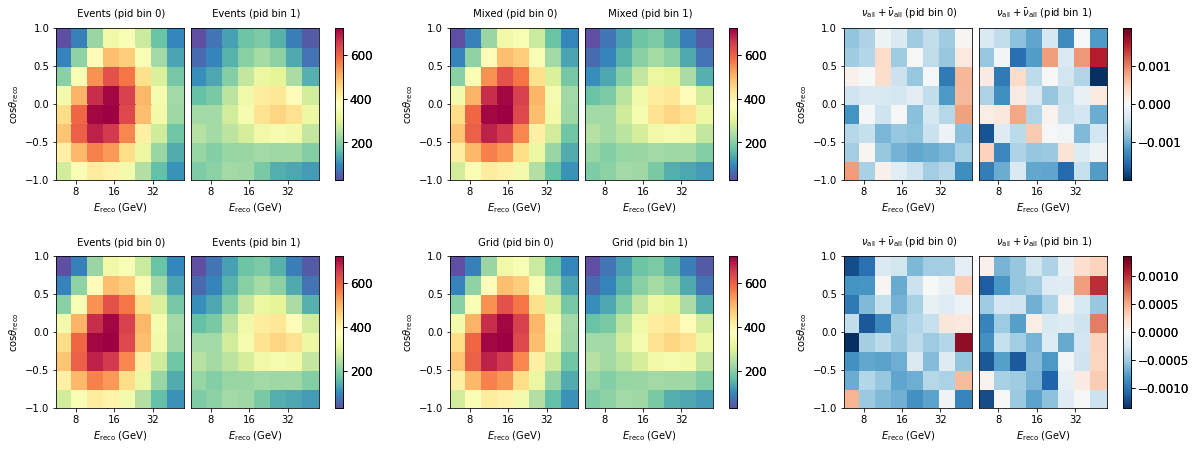

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))
plt.subplots_adjust(hspace=0.5)

e = events.combine_wildcard('*')
m = mixed.combine_wildcard('*') 
g = grid.combine_wildcard('*') 

e.plot(ax=ax[0,0], title="Events")
m.plot(ax=ax[0,1], title="Mixed")
((e - m)/e).plot(ax=ax[0,2], symm=True)

e.plot(ax=ax[1,0], title="Events")
g.plot(ax=ax[1,1], title="Grid")
((e - g)/e).plot(ax=ax[1,2], symm=True)

In depth comparison of single maps:

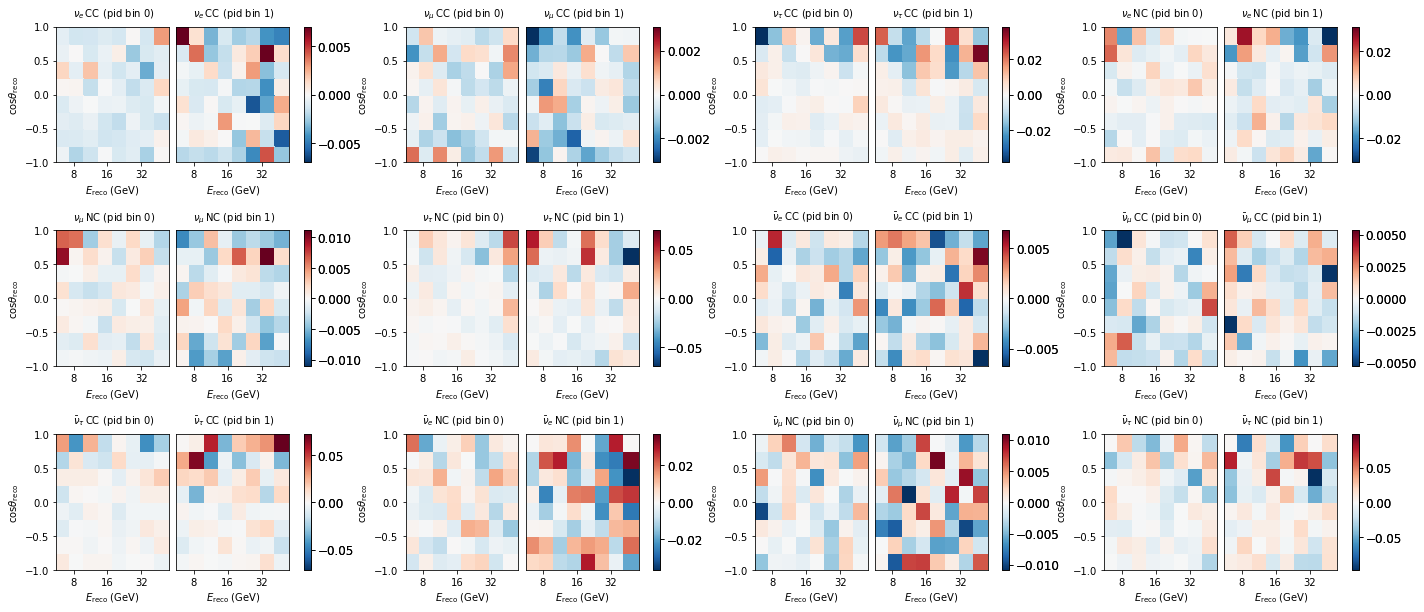

In [12]:
fig, axes = plt.subplots(3,4, figsize=(24,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()

diff = (events - mixed) / (events + 1e-7)

for m, ax in zip(diff, axes):
    m.plot(ax=ax, symm=True)

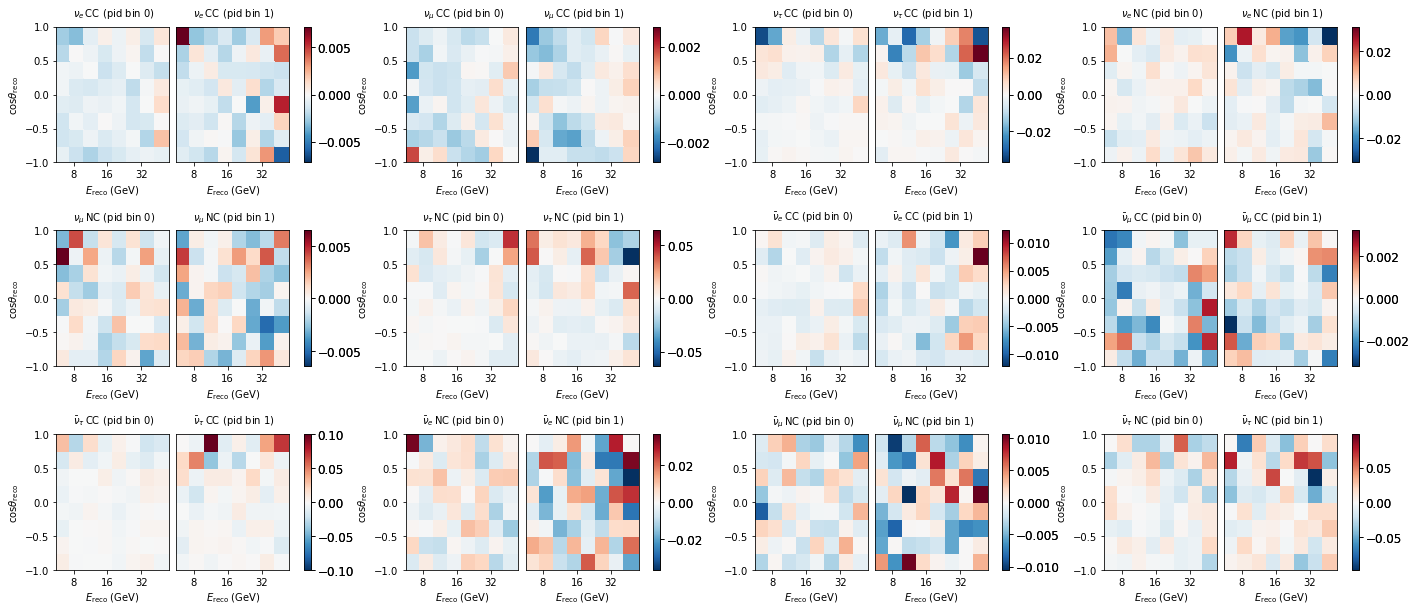

In [13]:
fig, axes = plt.subplots(3,4, figsize=(24,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()

diff = (events - grid) / (events + 1e-7)

for m, ax in zip(diff, axes):
    m.plot(ax=ax, symm=True)